In [1]:
import sys
sys.path.append('../') 
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary functions
from src.loader import load_data
from src.utils import get_top_handsets, get_top_manufacturers,get_top_handsets_by_top_manufacturers
from src.clean import clean_data

# Load data

sql_query = '''
    
 SELECT * FROM xdr_data
 '''

df = load_data(sql_query)





In [2]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [4]:
# Print unique values in the 'Handset Type' column
print(df['Handset Type'].unique())


['Samsung Galaxy A5 Sm-A520F' 'Samsung Galaxy J5 (Sm-J530)'
 'Samsung Galaxy A8 (2018)' ... 'Asustek Asus Zb500Kg'
 'Huawei Mediapad T5 10 Pro' 'Shenzhen Jeko Co. Blackview Bv5800 Pro']


In [3]:
# print(df['Handset Manufacturer'].unique())


In [5]:
# Check for NaN and None
print(df['Handset Type'].isnull().sum())

# Check for strings that could represent missing values
missing_indicators = ['', ' ', 'N/A', 'unknown', 'undefined']
for indicator in missing_indicators:
    count = (df['Handset Type'] == indicator).sum()
    print(f"'{indicator}' count: {count}")


572
'' count: 0
' ' count: 0
'N/A' count: 0
'unknown' count: 0
'undefined' count: 8987


In [6]:
# Re-apply the cleaning function
df_cleaned = clean_data(df)


In [7]:
# Check for NaN and None
print(df_cleaned['Handset Type'].isnull().sum())

# Check for strings that could represent missing values
missing_indicators = ['', ' ', 'N/A', 'unknown', 'undefined']
for indicator in missing_indicators:
    count = (df_cleaned['Handset Type'] == indicator).sum()
    print(f"'{indicator}' count: {count}")


9559
'' count: 0
' ' count: 0
'N/A' count: 0
'unknown' count: 0
'undefined' count: 0


In [8]:
# Use utility functions to analyze data
top_handsets = get_top_handsets(df_cleaned)
top_manufacturers = get_top_manufacturers(df_cleaned)
# Assuming df is your DataFrame containing the telecom data
top_handsets_by_manufacturer = get_top_handsets_by_top_manufacturers(df_cleaned)

Text(0, 0.5, 'Handset type')

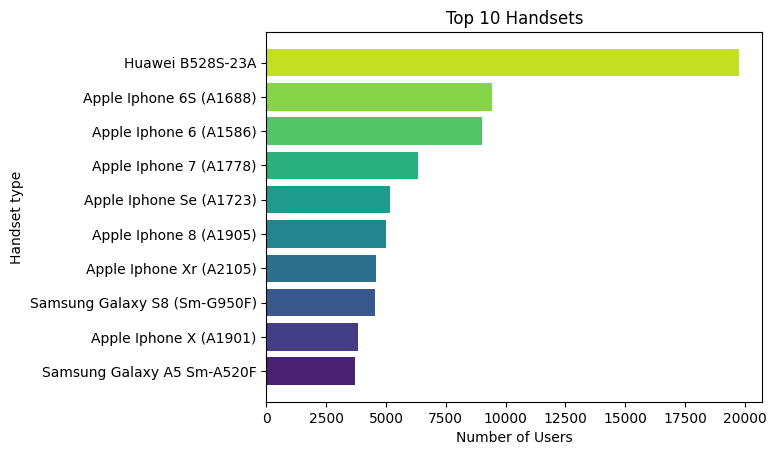

In [9]:

# Plotting the top handsets
colors = sns.color_palette('viridis', n_colors=len(top_handsets))  # Generate a color palette
top_handsets = top_handsets.sort_values(ascending=True)  # Sort values for a better visual output
plt.barh(top_handsets.index, top_handsets.values, color=colors)  # Create a horizontal bar plot
plt.title('Top 10 Handsets')
plt.xlabel('Number of Users')
plt.ylabel('Handset type')


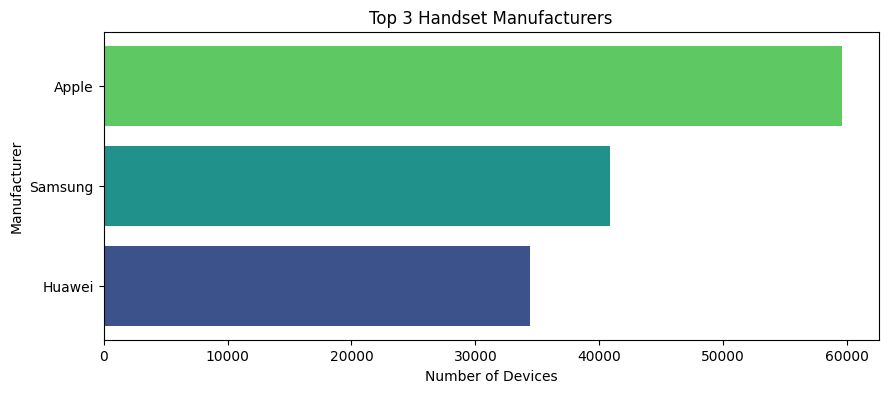

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top_manufacturers' is a pandas Series with manufacturers as the index
# and their counts as the values.
plt.figure(figsize=(10, 4))
colors = sns.color_palette('viridis', n_colors=len(top_manufacturers))  # Generate a color palette
top_manufacturers = top_manufacturers.sort_values(ascending=True)  # Sort values for a better visual output
plt.barh(top_manufacturers.index, top_manufacturers.values, color=colors)  # Create a horizontal bar plot
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Number of Devices')
plt.ylabel('Manufacturer')
plt.show()  


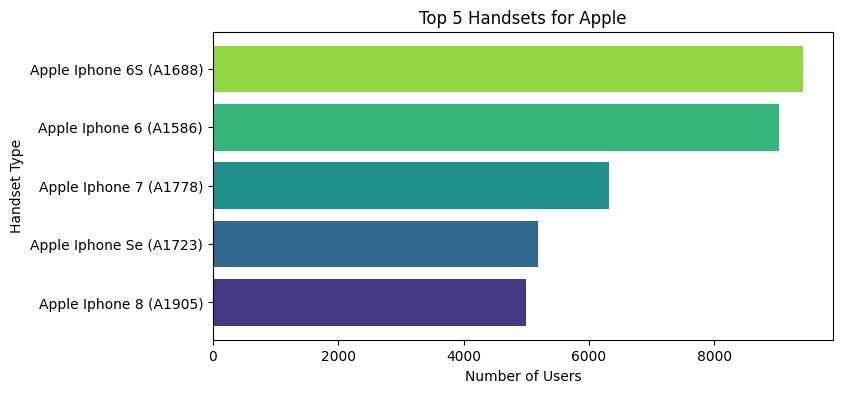

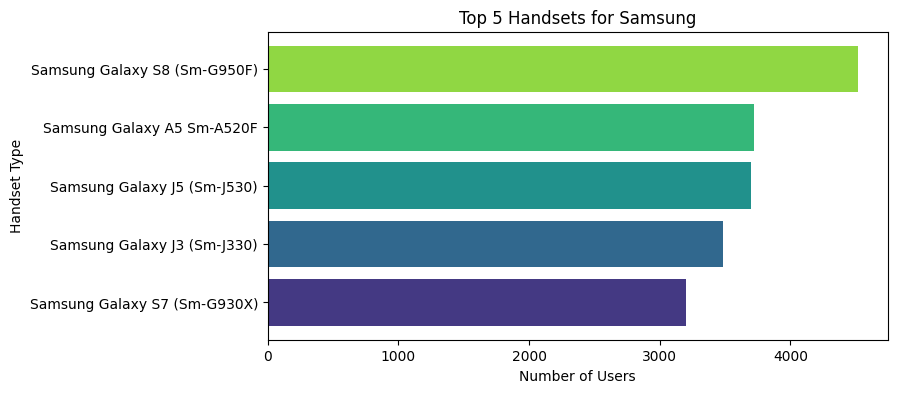

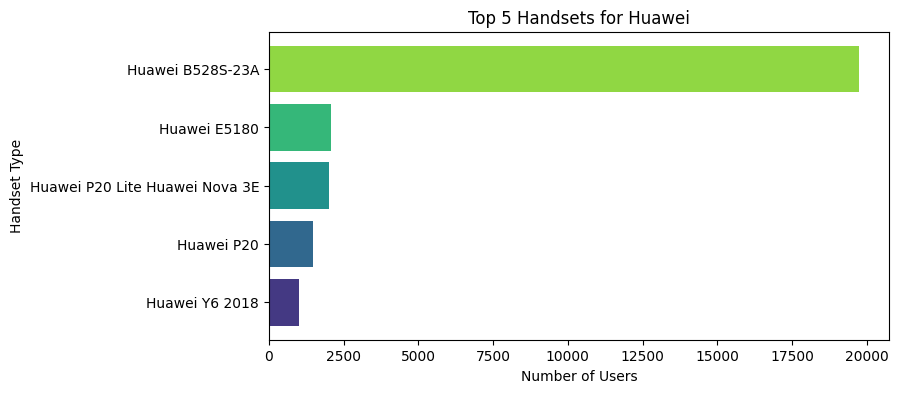

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_handsets_by_manufacturer is a dictionary with manufacturers as keys
# and Series objects as values (where the Series index is handset types and values are counts)
for manufacturer, handsets in top_handsets_by_manufacturer.items():
    plt.figure(figsize=(8, 4))
    colors = sns.color_palette('viridis', n_colors=len(handsets))  # Get a list of colors based on the number of handsets
    handsets = handsets.sort_values(ascending=True)  # Sort values for a better visual output
    plt.barh(handsets.index, handsets.values, color=colors)  # horizontal bar plot
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Number of Users')
    plt.ylabel('Handset Type')
    plt.show()
